In [4]:
# Importando as bibliotecas essenciais para análise de dados e visualização
import pandas as pd  # Para manipulação de dataframes
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para geração de gráficos
import seaborn as sns  # Para visualizações estatísticas mais avançadas
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk

sns.set_theme(style="whitegrid", palette="Set2", context="talk")

plt.style.use('fivethirtyeight')  # ou 'ggplot', 'seaborn-whitegrid', etc.


In [5]:
# Lendo o arquivo CSV 'IMBD.csv' em um DataFrame
df = pd.read_csv("/Users/italolopes/Downloads/IMDB Dataset.csv")

In [6]:
# Mostrando as primeiras linhas para entender o dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Mostrando as últimas linhas para entender o dataset
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [8]:
# Mostrando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
# Verificando a distribuição de sentimentos no dataset
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Análise exploratória de dados

> Adicionar aspas



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


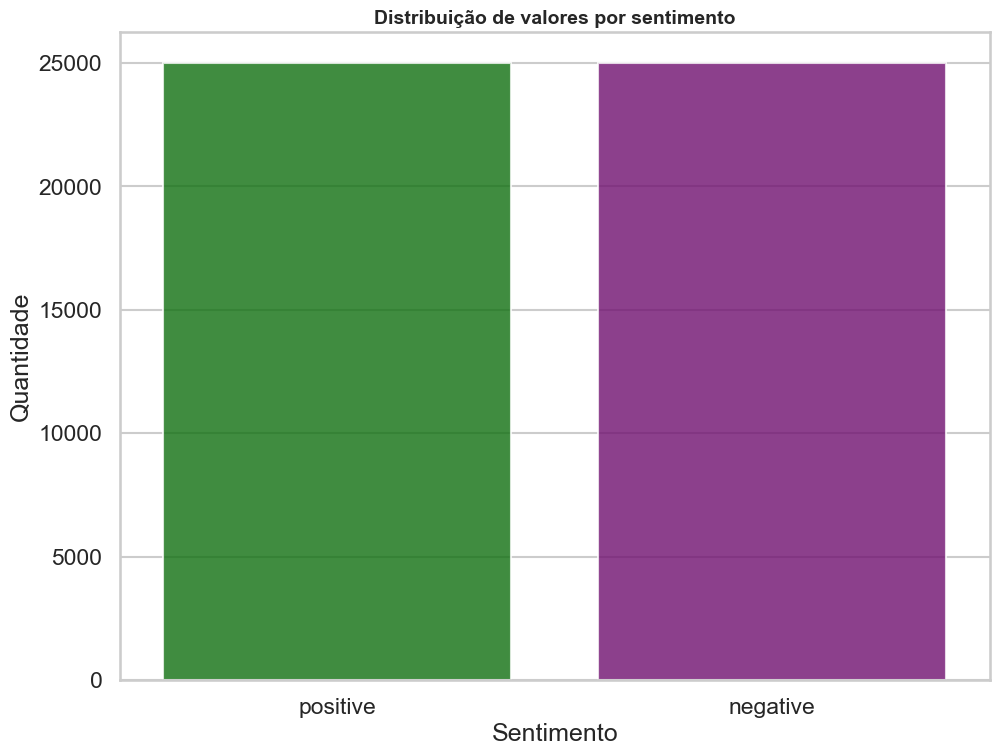

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuste de estilo e fonte
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 8))

sns.countplot(
    x='sentiment',
    hue='sentiment',                # Define a cor pela mesma coluna
    data=df,
    dodge=False,                    # Evita barras lado a lado
    palette={'positive': 'green', 'negative': 'purple'},
    alpha=0.8
)

plt.title('Distribuição de valores por sentimento', fontsize=14, fontweight='bold')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')

plt.show()

In [39]:
df['clean_review'] = df['review'].apply(lambda x: str(x))

# 2) Calcule o comprimento do texto (número de palavras)
df['text_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# 3) Mapeie o sentimento para valores numéricos (0 e 1)
sentiment_map = {'negative': 0, 'positive': 1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

# Separar dados por sentimento
df_positive = df[df['sentiment_numeric'] == 1]
df_negative = df[df['sentiment_numeric'] == 0]
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
df.head()  # Mostra as 5 primeiras linhas

,review,sentiment,clean_review,text_length,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,307,1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,162,1
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,166,1
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",230,1


In [40]:
import pandas as pd

# Exemplo de DataFrame df, já com 'text_length' e 'sentiment_numeric'
df_positive = df[df['sentiment_numeric'] == 1]
df_negative = df[df['sentiment_numeric'] == 0]

# Calcular IQR e limites para positivos
q1_pos = df_positive['text_length'].quantile(0.25)
q3_pos = df_positive['text_length'].quantile(0.75)
iqr_pos = q3_pos - q1_pos

# Ajuste aqui o fator, por exemplo, 2.0
factor = 1.5
lower_pos = q1_pos - factor * iqr_pos
upper_pos = q3_pos + factor * iqr_pos

# Filtrar outliers
df_filtrado_positivo = df_positive[
    (df_positive['text_length'] >= lower_pos) &
    (df_positive['text_length'] <= upper_pos)
]

# Mesma coisa para negativos
q1_neg = df_negative['text_length'].quantile(0.25)
q3_neg = df_negative['text_length'].quantile(0.75)
iqr_neg = q3_neg - q1_neg

lower_neg = q1_neg - factor * iqr_neg
upper_neg = q3_neg + factor * iqr_neg

df_filtrado_negativo = df_negative[
    (df_negative['text_length'] >= lower_neg) &
    (df_negative['text_length'] <= upper_neg)
]

# Juntar
df_filtrado = pd.concat([df_filtrado_positivo, df_filtrado_negativo], ignore_index=True)
print("Outliers positivos:", df_positive[df_positive['text_length'] > upper_pos].shape[0])
print("Outliers negativos:", df_negative[df_negative['text_length'] > upper_neg].shape[0])

Outliers positivos: 1899
Outliers negativos: 1776


In [41]:
import string

# Função ajustada: remove apenas pontuações
def clean_text(text):
    text = text.lower()
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    return text_no_punct


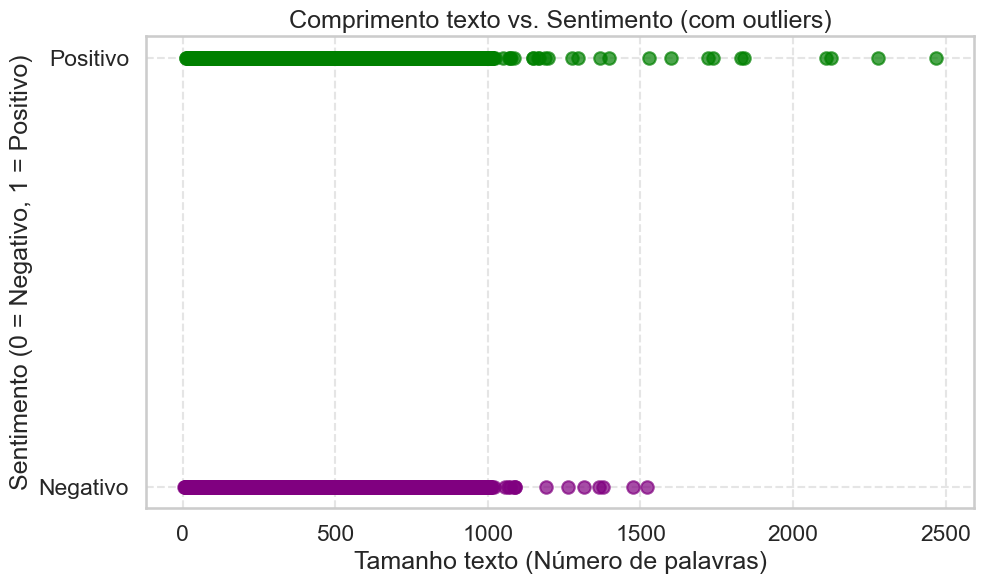

In [42]:
import matplotlib.pyplot as plt

# Ajustar estilo da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

# Separar dados por sentimento no df com outliers
df_positive = df[df['sentiment_numeric'] == 1]
df_negative = df[df['sentiment_numeric'] == 0]

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar reviews positivos
plt.scatter(
    df_positive['text_length'],
    df_positive['sentiment_numeric'],
    color='green',
    alpha=0.7,

)

# Plotar reviews negativos
plt.scatter(
    df_negative['text_length'],
    df_negative['sentiment_numeric'],
    color='purple',
    alpha=0.7,

)



# Personalizar e exibir
plt.xlabel("Tamanho texto (Número de palavras)")
plt.ylabel("Sentimento (0 = Negativo, 1 = Positivo)")
plt.title("Comprimento texto vs. Sentimento (com outliers)")
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

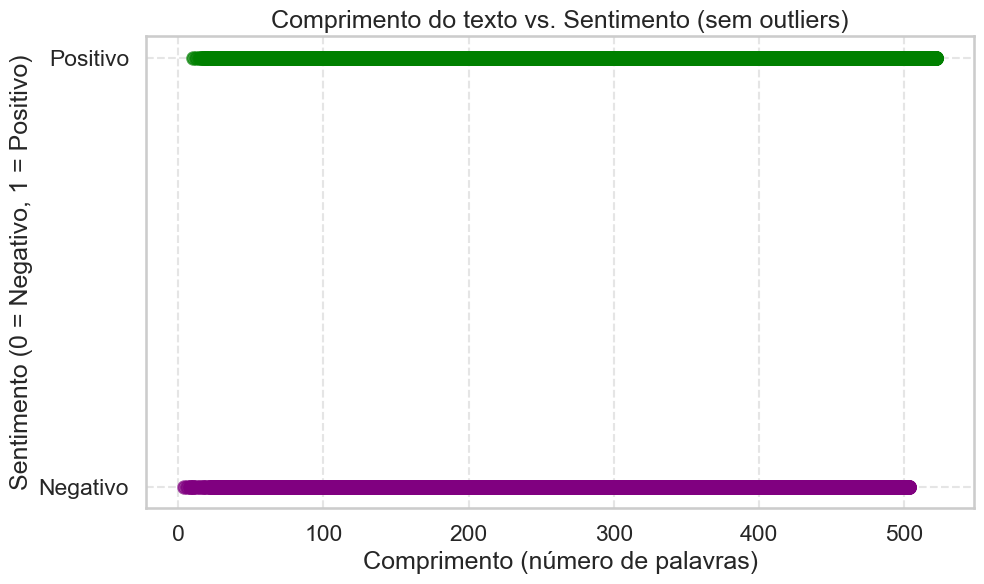

In [43]:
import matplotlib.pyplot as plt

# Ajustar estilo da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

df3 = df_filtrado

# Separar os dados por sentimento
df_positive = df3[df3['sentiment_numeric'] == 1]
df_negative = df3[df3['sentiment_numeric'] == 0]

# Limites superiores IQR
iqr_pos_sup = 282.5
iqr_neg_sup = 269.5

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    df_positive['text_length'],
    df_positive['sentiment_numeric'],
    color='green',
    alpha=0.7,

)

plt.scatter(
    df_negative['text_length'],
    df_negative['sentiment_numeric'],
    color='purple',
    alpha=0.7,

)


# Eixos e título
plt.xlabel("Comprimento (número de palavras)")
plt.ylabel("Sentimento (0 = Negativo, 1 = Positivo)")
plt.title("Comprimento do texto vs. Sentimento (sem outliers)")
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

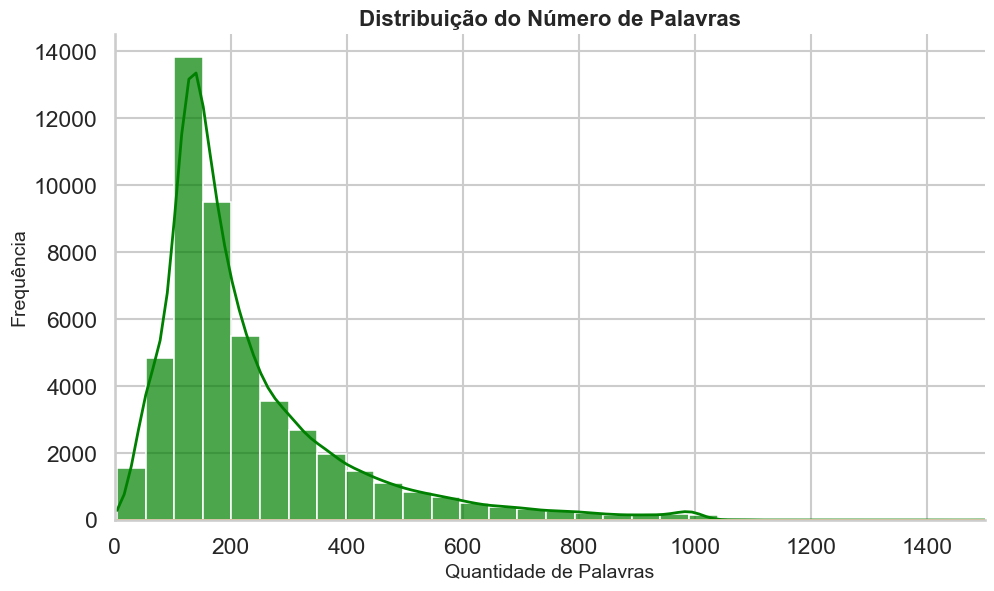

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

# Histograma com curva de densidade
sns.histplot(
    data=df,
    x='text_length',
    bins=50,
    color='green',
    alpha=0.7,
    kde=True,
    line_kws={'color': 'orange', 'lw': 2}
)

# Curva de densidade extra (opcional)
sns.kdeplot(
    data=df,
    x='text_length',
    color='orange',
    lw=2
)

plt.xlim(0, 1500)
plt.title("Distribuição do Número de Palavras", fontsize=16, fontweight='bold')
plt.xlabel("Quantidade de Palavras", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

sns.despine()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/italolopes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/qg/p28p4zt14lg0rbc6mzlt8psh0000gn/T/ipykernel_15399/1378637503.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


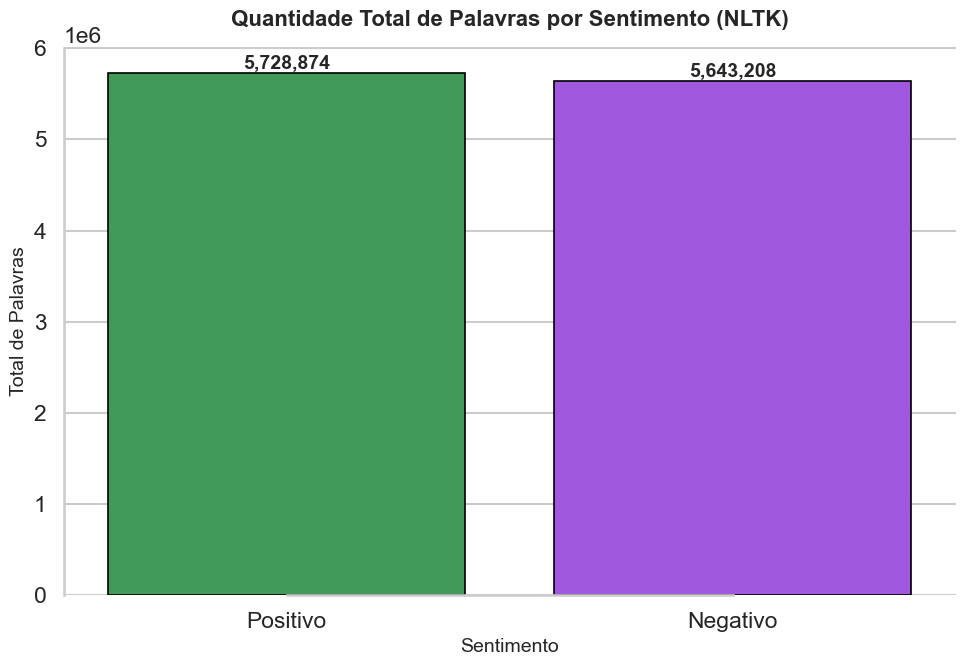

In [45]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Garantir download do pacote necessário do nltk
nltk.download('punkt')

# Função para contar palavras excluindo pontuações
def contar_palavras(texto):
    tokens = word_tokenize(str(texto))
    palavras = [palavra for palavra in tokens if palavra.isalpha()]
    return len(palavras)

# Aplica a função na coluna 'review' para obter a quantidade de palavras
df['text_length'] = df['review'].apply(contar_palavras)

# Mapeia sentimentos para numéricos
sentiment_map = {'negative': 0, 'positive': 1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

# Separa por sentimentos após contagem
df_positive = df[df['sentiment_numeric'] == 1]
df_negative = df[df['sentiment_numeric'] == 0]

# Soma total de palavras por sentimento
total_palavras_positivo = df_positive['text_length'].sum()
total_palavras_negativo = df_negative['text_length'].sum()

# DataFrame para o gráfico
df_palavras_sentimento = pd.DataFrame({
    'Sentimento': ['Positivo', 'Negativo'],
    'Total Palavras': [total_palavras_positivo, total_palavras_negativo]
})

# Gráfico de barras estilizado
sns.set_theme(style="whitegrid", context="talk", font_scale=1.0)

plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(
    x='Sentimento',
    y='Total Palavras',
    data=df_palavras_sentimento,
    palette=['#34a853', '#a142f5'],
    edgecolor='black',
    linewidth=1.2
)

# Mostrar valores sobre as barras
for index, row in df_palavras_sentimento.iterrows():
    bar_plot.text(
        index,
        row['Total Palavras'],
        f"{row['Total Palavras']:,}",
        ha='center',
        va='bottom',
        fontsize=14,
        fontweight='bold'
    )

# Ajustes visuais adicionais
plt.title('Quantidade Total de Palavras por Sentimento (NLTK)', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total de Palavras', fontsize=14)
plt.xlabel('Sentimento', fontsize=14)

sns.despine(trim=True)
plt.tight_layout()

# Exibir gráfico
plt.show()

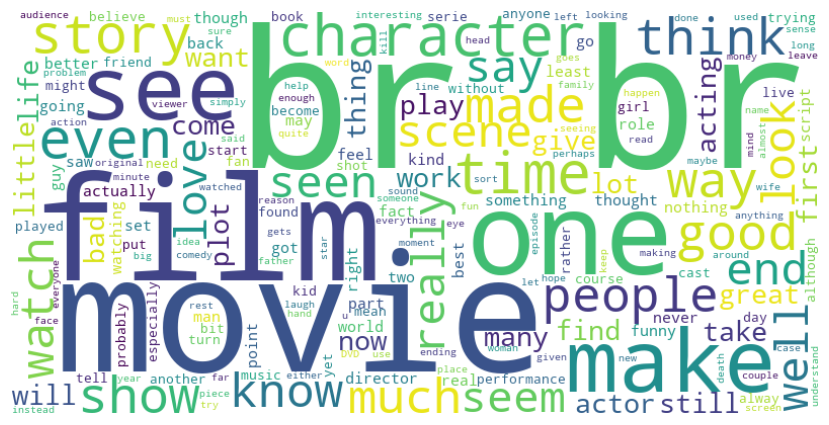

In [46]:
# Importando a classe WordCloud do módulo wordcloud para a criação de nuvens de palavras.
from wordcloud import WordCloud


# União de todas as avaliações em um único texto
text = " ".join(df["review"])

# Gerar a nuvem de palavras mais comuns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


# Exibir a nuvem de palavras mais comuns
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

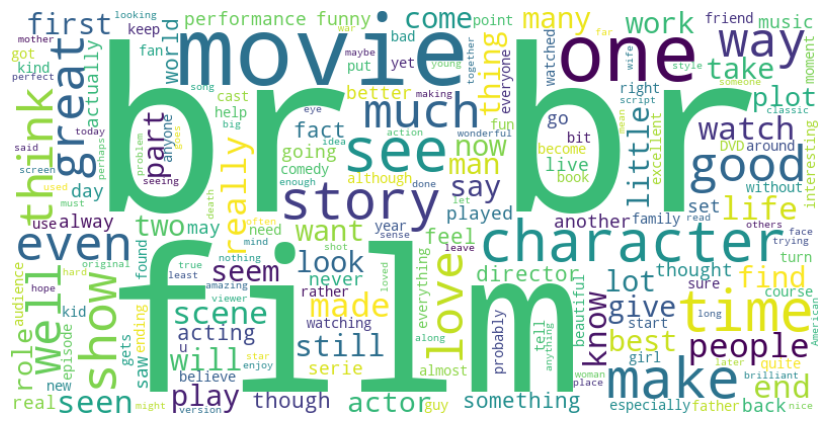

In [47]:

# Separar avaliações positivas
positive_text = " ".join(df[df["sentiment"] == "positive"]["review"])


# Gerar nuvem de palavras mais comuns para classe positiva
pos_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)


# Exibir a nuvem de palavras mais comuns para a classe positiva
plt.figure(figsize=(10,5))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

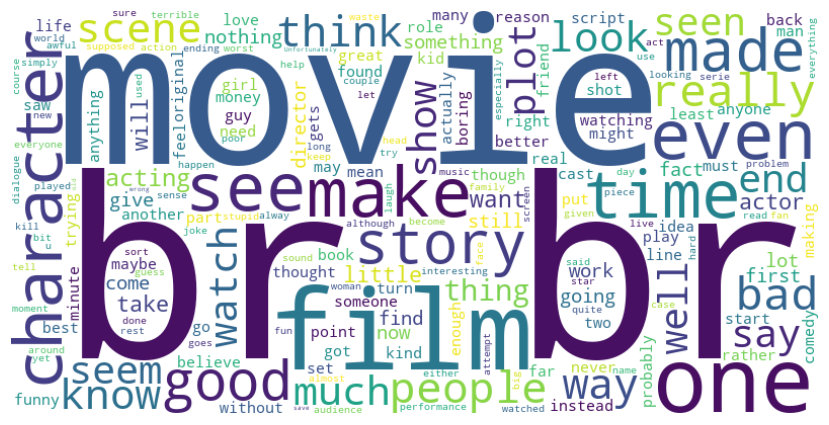

In [48]:
# Separar avaliações negativas
negative_text = " ".join(df[df["sentiment"] == "negative"]["review"])


# Gerar nuvem de palavras mais comuns para classe negativa
neg_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)


# Exibir a nuvem de palavras mais comuns para a classe negativa
plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


nltk.download('punkt_tab')
nltk.download('stopwords')

True

# Definir stopwords e pontuação para remoção
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


def process_text(text):
    """Tokeniza o texto, remove stopwords e pontuação"""
    tokens = word_tokenize(text.lower())  # Converter para minúsculas e tokenizar
    words = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remover stopwords e pontuação
    return words


# Processar avaliações para cada classe
positive_words = process_text(positive_text)
negative_words = process_text(negative_text)


# Contar frequência das palavras
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)


# Exibir frequência de palavras mais comuns para a classe positiva
print("Palavras mais comuns em avaliações POSITIVAS:")
print(positive_freq)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/italolopes/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/italolopes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palavras mais comuns em avaliações POSITIVAS:
[('br', 97954), ('film', 40765), ('movie', 36706), ('one', 26537), ('like', 17231), ('good', 14492), ('great', 12811), ('story', 12531), ('see', 11978), ('time', 11867), ('would', 11251), ('well', 11230), ('also', 10727), ('really', 10713), ('even', 9575), ('much', 9067), ('first', 8979), ('people', 8609), ('love', 8455), ('best', 8350)]


/var/folders/qg/p28p4zt14lg0rbc6mzlt8psh0000gn/T/ipykernel_15399/2500785376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


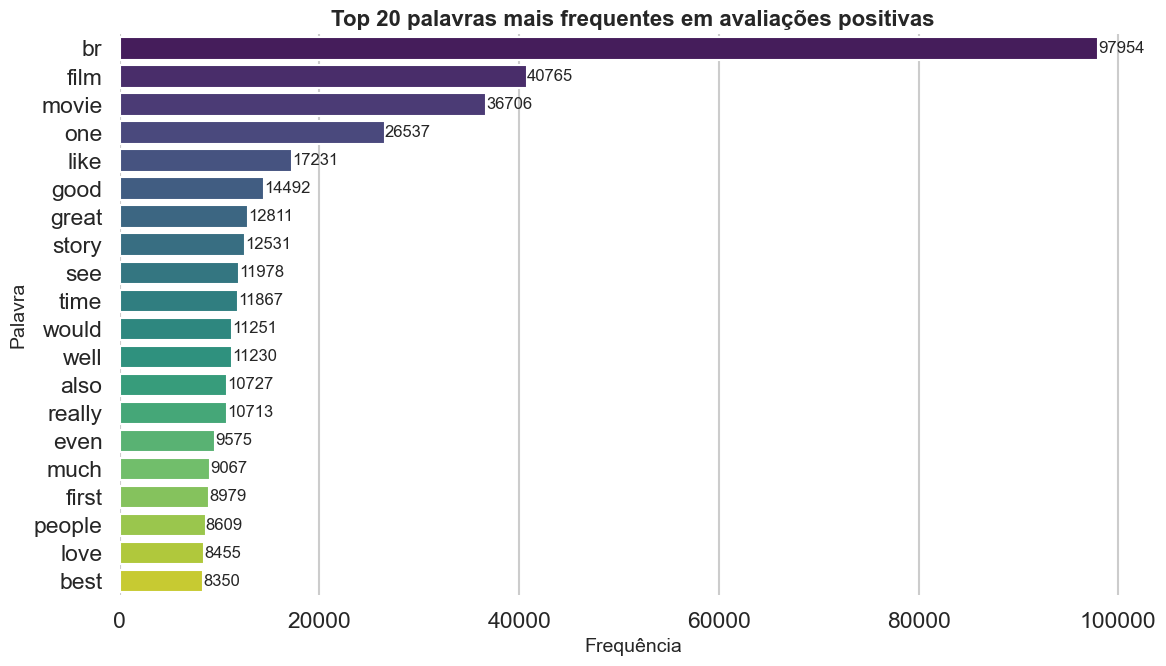

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converter a lista de tuplas em DataFrame para facilitar a plotagem
df_positive_freq = pd.DataFrame(positive_freq, columns=['Palavra', 'Frequência'])

# Gráfico estilizado
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_positive_freq,
    x='Frequência',
    y='Palavra',
    palette='viridis'
)

# Ajustes visuais
plt.title('Top 20 palavras mais frequentes em avaliações positivas', fontsize=16, fontweight='bold')
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Palavra', fontsize=14)

# Mostrar valores nas barras
for index, value in enumerate(df_positive_freq['Frequência']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()

# Exibir gráfico
plt.show()

In [51]:

# Exibir frequência de palavras mais comuns para a classe negativa
print("\nPalavras mais comuns em avaliações NEGATIVAS:")
print(negative_freq)


Palavras mais comuns em avaliações NEGATIVAS:
[('br', 103997), ('movie', 48364), ('film', 36154), ('one', 25291), ('like', 21952), ('would', 15224), ('even', 15205), ('good', 14275), ('bad', 14223), ('really', 12311), ('time', 11614), ('could', 11342), ('see', 10660), ('get', 10058), ('much', 9953), ('story', 9810), ('people', 9353), ('make', 9010), ('made', 8416), ('first', 8221)]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/italolopes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/italolopes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/qg/p28p4zt14lg0rbc6mzlt8psh0000gn/T/ipykernel_15399/56117044.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


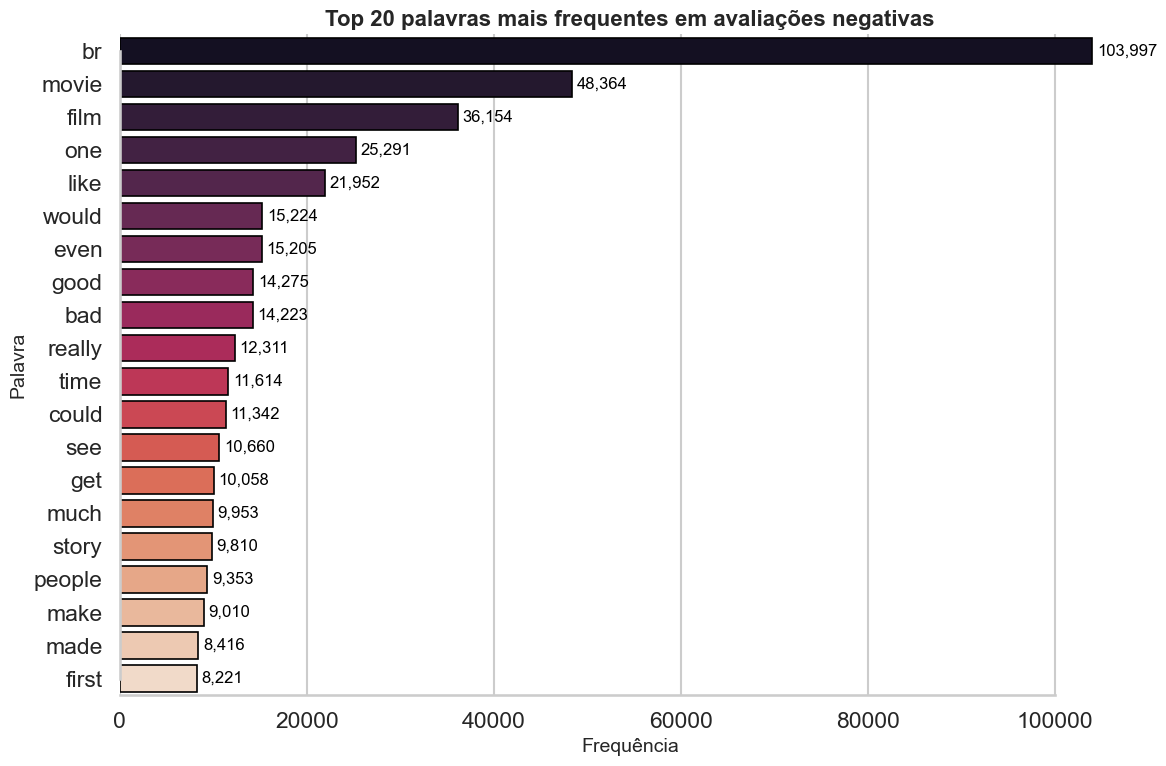

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def contar_palavras(texto):
    tokens = word_tokenize(str(texto).lower())
    palavras = [palavra for palavra in tokens if palavra.isalpha() and palavra not in stop_words]
    return palavras

# Aplicar a contagem correta usando seu DataFrame
positive_reviews = df[df['sentiment_numeric'] == 1]['review'].apply(contar_palavras).sum()
negative_reviews = df[df['sentiment_numeric'] == 0]['review'].apply(contar_palavras).sum()

# Frequências de palavras mais comuns
positive_freq = Counter(positive_reviews).most_common(20)
negative_freq = Counter(negative_reviews).most_common(20)

# Gráfico para NEGATIVAS (exemplo):
df_negative = pd.DataFrame(negative_freq, columns=['Palavra', 'Frequência'])

sns.set_theme(style="whitegrid", context="talk", font_scale=1.0)
plt.figure(figsize=(12, 8))

bar_plot = sns.barplot(
    y='Palavra',
    x='Frequência',
    data=df_negative,
    palette='rocket',
    edgecolor='black',
    linewidth=1.2
)

for index, row in df_negative.iterrows():
    bar_plot.text(
        row['Frequência'] + 500, index,
        f"{row['Frequência']:,}",
        color='black', va="center", fontsize=12
    )

plt.title('Top 20 palavras mais frequentes em avaliações negativas', fontsize=16, fontweight='bold')
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Palavra', fontsize=14)

sns.despine(trim=True)
plt.tight_layout()

plt.show()

#Pré-Processamento de Dados

In [10]:
# Importando TF-IDF para vetorizar o texto, transformando-o em uma representação numérica.
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Definindo corpus
corpus = df['review']

In [12]:
# Inicializando e aplicando o vetorizador TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [13]:
# Definindo a variável alvo (sentimento)
y = df['sentiment']

In [14]:
# Importando LabelEncoder para converter as labels.
from sklearn.preprocessing import LabelEncoder

In [15]:
# Criando uma variável para armazenar o método escolhido
encoder = LabelEncoder()

In [16]:
# Convertendo as labels de 'positive' e 'negative' em números.
y = encoder.fit_transform(y)

In [17]:
# Importando train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split, cross_validate

In [18]:
# Dividindo os dados em treino e teste (67% para treino, 33% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Verificando o tamanho dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33500, 101895), (16500, 101895), (33500,), (16500,))

#Processamento de Dados

In [20]:
# Importando LogisticRegression para treinar um modelo de regressão logística.
from sklearn.linear_model import LogisticRegression

In [21]:
# Criando uma variável para armazenar o modelo escolhido
model = LogisticRegression()

In [22]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Fazendo predições no conjunto de teste
y_pred = model.predict(X_test)

In [24]:
# Importando as métricas para avaliar o desempenho do modelo
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [25]:
# Calcula e imprime a acurácia do modelo.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}% ")

Acurácia: 89.72% 


In [26]:
# Calcula e imprime a precisão do modelo.
precision = precision_score(y_test, y_pred)
print(f"Precisão: {precision * 100:.2f}%")

Precisão: 88.75%


In [27]:
# Calcula e imprime a sensibilidade do modelo.
recall = recall_score(y_test, y_pred)
print(f"Precisão: {recall * 100:.2f}%")

Precisão: 91.09%


In [28]:
# Executa a validação cruzada para obter uma estimativa melhor da acurácia, do precision e do recall do modelo.
valid_cross = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall'])
print(f"Accuracy: {valid_cross['test_accuracy'].mean()*100:.4f}%")
print(f"Precision: {valid_cross['test_precision'].mean()*100:.4f}%")
print(f"Recall: {valid_cross['test_recall'].mean()*100:.4f}%")

Accuracy: 89.0925%
Precision: 88.2860%
Recall: 90.0885%


In [29]:
# A matriz de confusão é uma tabela que descreve o desempenho do modelo de classificação.
cm = confusion_matrix(y_test, y_pred)

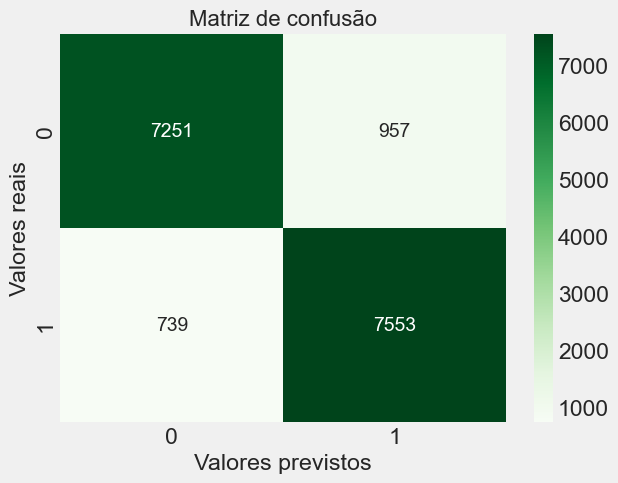

In [30]:
# Criando um mapa de calor (heatmap) da matriz de confusão usando a biblioteca seaborn.
cm_plot = sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
cm_plot.set_xlabel('Valores previstos')
cm_plot.set_ylabel('Valores reais')
cm_plot.set_title('Matriz de confusão', size=16)
plt.show()

In [31]:

from sklearn.neighbors import KNeighborsClassifier


knntreino = KNeighborsClassifier(n_neighbors=1)

# Treinando o modelo KNN com os dados de treino
knntreino.fit(X_train, y_train)

# Teste de predição
y_pred_knn = knntreino.predict(X_test)

# Calcula e imprime a acurácia do modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do KNN: {accuracy_knn * 100:.2f}%")

# Calcula e imprime a precisão do modelo KNN
precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precisão do KNN: {precision_knn * 100:.2f}%")

# Calcula e imprime a sensibilidade do modelo KNN
recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall do KNN: {recall_knn * 100:.2f}%")

# Executa a validação cruzada para obter uma estimativa melhor da acurácia, do precision e do recall do modelo (versão KNN).

valid_cross_knn = cross_validate(knntreino, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall'])
print(f"Accuracy do KNN (validação cruzada): {valid_cross_knn['test_accuracy'].mean()*100:.4f}%")
print(f"Precision do KNN (validação cruzada): {valid_cross_knn['test_precision'].mean()*100:.4f}%")
print(f"Recall do KNN (validação cruzada): {valid_cross_knn['test_recall'].mean()*100:.4f}%")


Acurácia do KNN: 73.57%
Precisão do KNN: 71.95%
Recall do KNN: 77.69%
Accuracy do KNN (validação cruzada): 72.4060%
Precision do KNN (validação cruzada): 70.8662%
Recall do KNN (validação cruzada): 75.8738%


In [32]:
# Importando as bibliotecas necessárias para tunagem de hiperparâmetros
from sklearn.model_selection import GridSearchCV


# Definindo o espaço de parâmetros para o GridSearchCV
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],  # Número de vizinhos
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [33]:
# Importando a classe KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Configurando o GridSearchCV para o KNeighborsClassifier
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),  # Usando o KNeighborsClassifier
    param_grid=param_grid_knn,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

In [34]:
# Executando o GridSearchCV nos dados de treino
grid_search_knn.fit(X_train, y_train)

# Mostra quais foram os melhores parâmetros
print("Melhores parâmetros encontrados: ", grid_search_knn.best_params_)

# Mostra qual a melhor pontuação
print("Melhor pontuação de precisão: ", grid_search_knn.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frame

Melhores parâmetros encontrados:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Melhor pontuação de precisão:  0.8959469775834549


In [35]:
# Usando o melhor modelo encontrado para fazer previsões
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn_best = best_knn_model.predict(X_test)

# Calculando a acurácia do melhor modelo
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"Acurácia do melhor modelo KNN: {accuracy_knn_best * 100:.2f}%")

# Calculando a precisão do melhor modelo
precision_knn_best = precision_score(y_test, y_pred_knn_best)
print(f"Precisão do melhor modelo KNN: {precision_knn_best * 100:.2f}%")

# Calculando o recall do melhor modelo
recall_knn_best = recall_score(y_test, y_pred_knn_best)
print(f"Recall do melhor modelo KNN: {recall_knn_best * 100:.2f}%")

Acurácia do melhor modelo KNN: 50.18%
Precisão do melhor modelo KNN: 100.00%
Recall do melhor modelo KNN: 0.86%


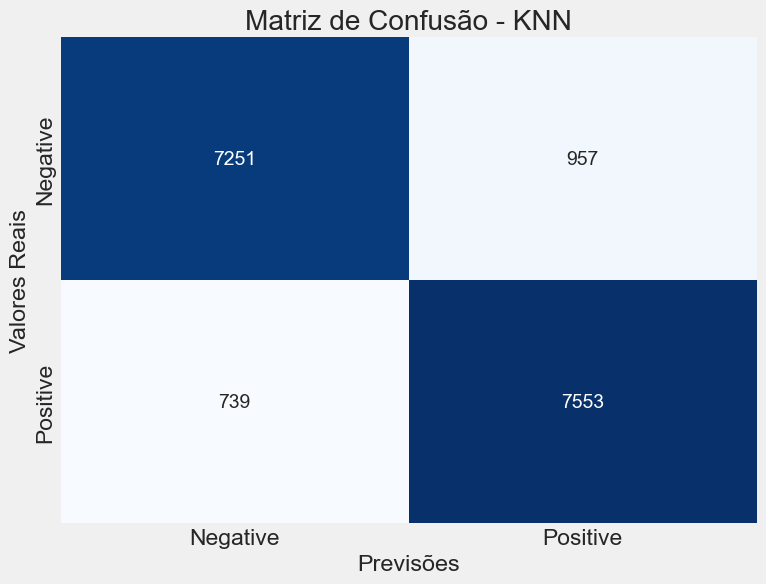

In [36]:
# 3. Calculando a matriz de confusão
cm3= confusion_matrix(y_test, y_pred_knn)

# 4. Visualizando a matriz de confusão com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - KNN')
plt.show()